In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px

# Solucion Reto
## 1. Análisis exploratorio
### 1.1 Integralidad de la información

In [3]:
data = pd.read_csv(r"C:\Users\Usuario\Ciencia de datos\MLPython\python-ml-course-master\datasets\data_prueba", sep ='\t')

Con la finalidad de encontrar nuestra variable objetivo y poder encontrar la demanda diaria, procedemos a transformar la tabla de manera que, agrupado por terminal y por día de la semana, podamos ver cuantas operaciones realiza en un día.

se expandirá la tabla de manera que pueda saber también a que franja horaria pertenece

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775466 entries, 0 to 775465
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   fecha       775466 non-null  object
 1   idTerminal  775466 non-null  int64 
 2   oper        775466 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 17.7+ MB


El primer paso que realizo es un análisis de los datos, entendiendo de manera adecuada la información que contiene cada una de als columnas, es necesario ajustar el tipo de variable de cada feature para que sea correspondiente con la naturaleza de la columna.

En este caso, la variable fecha, correspondiente a la fecha y hora en la cual se tomó el registro debería estar en formato datetime, IdTerminal, que corresponde a una identificación debería ser tipo object y oper, correspondiente al tipo de operación realizada, también debería ser tipo object.

Además, se creará la columna que indique a que día de la semana corresponde y a que franja horaria corresponde

In [5]:
new = data["fecha"].str.split(" ", n = 1, expand = True) #division de la columna de fecha para obtener fecha y hora
data["fecha1"] = new[0] # Creación columna de fecha
data["fecha"] = pd.to_datetime(data["fecha"]) #transformación de formato de columna a fecha

data['hora'] = data['fecha'].dt.hour # Encontrar la hora, sin minutos ni segundos
#Creación de columna de franja horaria
conditions = [
    (data['hora'] <= 5),
    (data['hora'] > 5) & (data['hora'] <= 11),
    (data['hora'] > 11) & (data['hora'] ) <= 17, 
    (data['hora'] > 17)]
values = ['madrugada', 'mañana', 'tarde', 'noche']
data['Franja_horaria'] = np.select(conditions, values)


data["fecha1"] =  pd.to_datetime(data["fecha1"]) #  transformación de columna de fecha en formato fecha
data['Dia_de_semana'] = data['fecha'].dt.day_name() # encontrar día de la semana


convert_dict ={"idTerminal" : object,
               "oper": object}
data[["idTerminal", "oper"]] = data[["idTerminal", "oper"]].astype(convert_dict)





data.drop(["hora"], axis= 1, inplace=True)
data.drop(["fecha"], axis=1, inplace =True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775466 entries, 0 to 775465
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idTerminal      775466 non-null  object        
 1   oper            775466 non-null  object        
 2   fecha1          775466 non-null  datetime64[ns]
 3   Franja_horaria  775466 non-null  object        
 4   Dia_de_semana   775466 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 29.6+ MB


En este punto además es necesario conocer si existen datos nulos en el dataset

In [7]:
data.isnull().sum()

idTerminal        0
oper              0
fecha1            0
Franja_horaria    0
Dia_de_semana     0
dtype: int64

Como se puede obervar, no existen datos nulos en el dataset, por lo tanto, no tendremos que aplicar ninguna transformación de datos para solcionar este problema.

In [8]:
# Explorando los primeros 50 datos para comprobar la integralidad
data.head(50)

,idTerminal,oper,fecha1,Franja_horaria,Dia_de_semana
0,1828,0,2017-01-31,mañana,Tuesday
1,1828,1,2017-01-31,mañana,Tuesday
2,1828,1,2017-01-31,mañana,Tuesday
3,1828,1,2017-01-31,mañana,Tuesday
4,1828,1,2017-01-31,mañana,Tuesday
5,1593,0,2017-01-31,mañana,Tuesday
6,1593,1,2017-01-31,mañana,Tuesday
7,1593,1,2017-01-31,mañana,Tuesday
8,1746,0,2017-01-31,mañana,Tuesday
9,1593,1,2017-01-31,mañana,Tuesday


In [9]:
# Exploración de los últimos 50 datos para comprobar la integralidad
data.tail(50)

,idTerminal,oper,fecha1,Franja_horaria,Dia_de_semana
775416,1971,0,2017-05-31,tarde,Wednesday
775417,1980,0,2017-05-31,tarde,Wednesday
775418,1574,0,2017-05-31,tarde,Wednesday
775419,1574,0,2017-05-31,tarde,Wednesday
775420,1971,3,2017-05-31,tarde,Wednesday
775421,1971,0,2017-05-31,tarde,Wednesday
775422,1980,0,2017-05-31,tarde,Wednesday
775423,1574,0,2017-05-31,tarde,Wednesday
775424,1980,0,2017-05-31,tarde,Wednesday
775425,1574,1,2017-05-31,tarde,Wednesday


### 1.2 Entendiendo el sistema
En este caso en particular, queremos conocer como se comportan en el tiempo la cantidad de operaciones, por fecha, a demás conocer como se comportan las operaciones por terminal y cuantas operaciones se hacen por tipo de operacion. El entendimiento correcto del sistema nos ayudará a encaminar de mejor manera el modelo


(array([736361., 736375., 736389., 736403., 736420., 736434., 736450.,
        736464., 736481.]),
 <a list of 9 Text major ticklabel objects>)

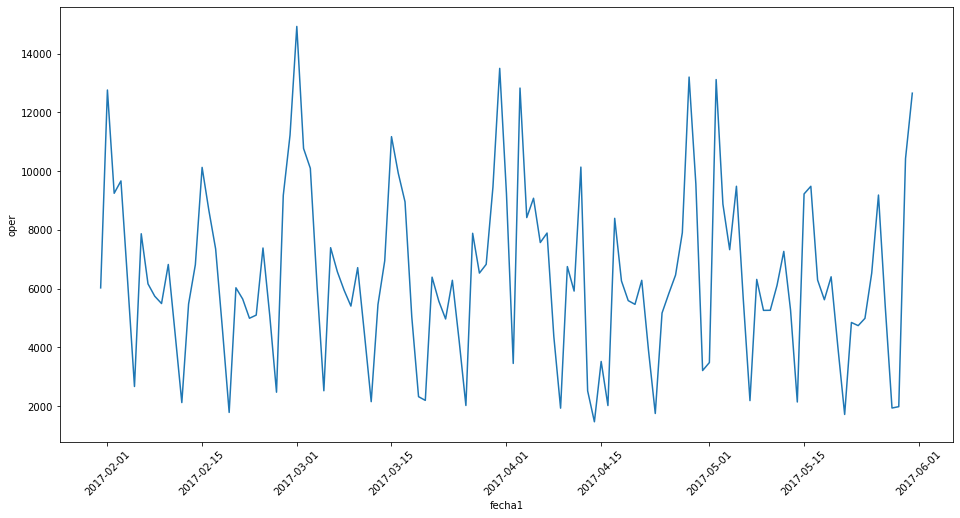

In [10]:
plt.figure(figsize=(16,8))
groupedbydate = data.groupby(["fecha1"]).count()
sns.lineplot(x=groupedbydate.index, y= "oper", data=groupedbydate)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

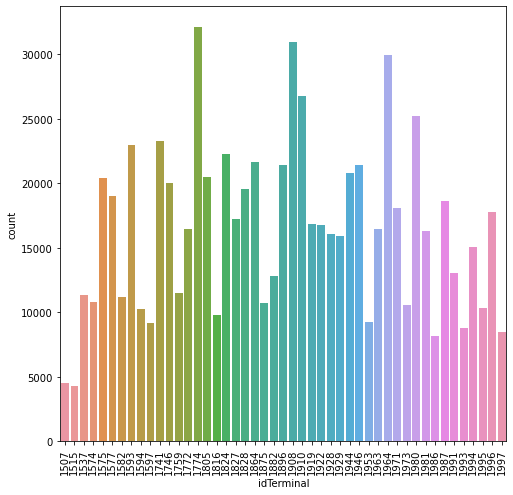

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(x="idTerminal", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

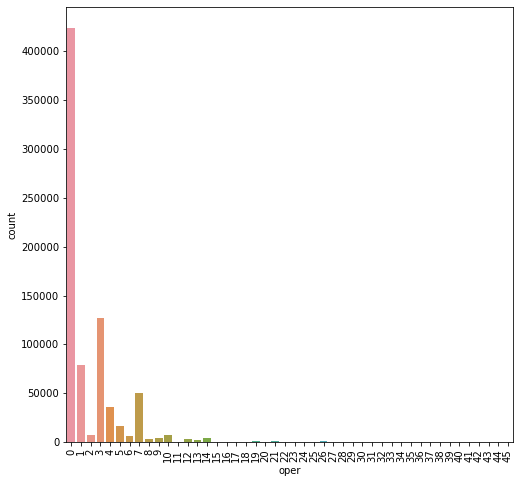

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x="oper", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

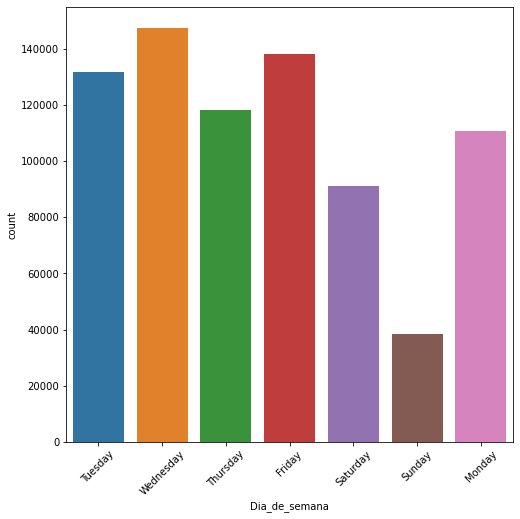

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x="Dia_de_semana", data=data)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

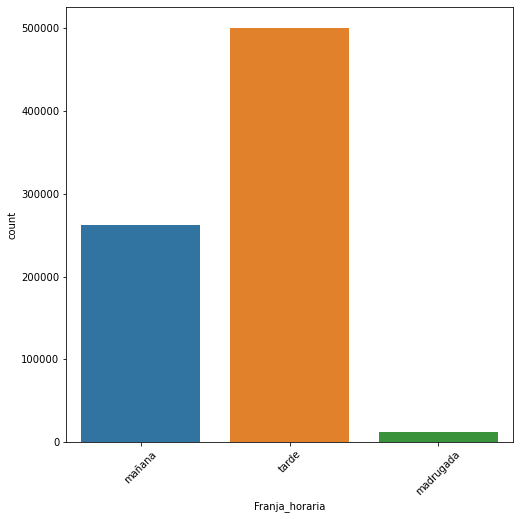

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x="Franja_horaria", data=data)
plt.xticks(rotation=45)

En las gráficas se puede observar la distribución de los datos por terminal, por día de la semana, por franja horaria y la frecuencia con la que se realiza cada tipo de operación, además, una linea de tiempo que nos deja ver con claridad los días para los cuales la cantidad de operaciones es baja y donde están los picos para dicha variable.

Se puede observar que los picos más altos en la cantidad de operaciones están cerca de los principios o fines de mes, entre el 27 y el 3 de cada mes respectivamente, además, también hay picos significativamente altos cerca de los 15. Debido a este comportamiento y por la naturaleza del problema, podemos inferir que la cantidad de operaciones esta directamente relacionada con las fechas de pago salarial para los trabajadores colombianos.

#### Resumen diagnostico del dataset:
* El contenido del dataset es de buena calidad, no tiene valores vacíos, tiene una buena cantidad de datos,el cual podríamos intentar robostecer por medio de un modelo de DL o por métodos de ensamblaje.
* Por la manera en la que decidí enfocar el problema, aún no tenemos con claridad una variaable objetivo, esta la lograré agrupando por día de la semana, franja horaria y por terminal, esto nos dará con mejor claridad un conteo de operaciones para cada una de las condiciones y nos permitirá llegar con mayor precisión a un resultado satisfactorio.
* Después de dicha transformación se realizará un nuevo análisis gráfico que nos permita tenemer mayor claridad sobre el problema que enfrentamos.

### 1.3. Análisis gráfico y de correlación

### 1.3.1 Análisis gráfico

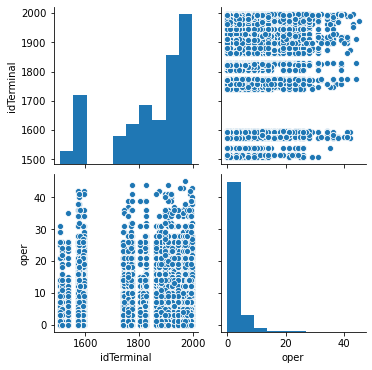

In [16]:
sns.pairplot(data=data)

In [124]:
# En este punto ya no necesitamos la columna de fecha, pues esta no puede ser introducida en un modelo
data.drop(["fecha1"], axis=1, inplace=True)
data.head()

,idTerminal,oper,Franja_horaria,Dia_de_semana
0,1828,0,mañana,Tuesday
1,1828,1,mañana,Tuesday
2,1828,1,mañana,Tuesday
3,1828,1,mañana,Tuesday
4,1828,1,mañana,Tuesday


In [127]:
dataNew = data.groupby(["idTerminal","Dia_de_semana","Franja_horaria"]).count()
dataNew.head()

oper
idTerminal Dia_de_semana Franja_horaria      
1507       Friday        mañana           252
                         tarde            458
           Monday        mañana           331
                         tarde            434
           Saturday      mañana           258

In [129]:
data.head()

,idTerminal,oper,Franja_horaria,Dia_de_semana
0,1828,0,mañana,Tuesday
1,1828,1,mañana,Tuesday
2,1828,1,mañana,Tuesday
3,1828,1,mañana,Tuesday
4,1828,1,mañana,Tuesday
